link to full MobileNetV2: \
https://drive.google.com/drive/folders/1zniIn6hHlYcMPygD5Dq6USY-bLd0ds69?usp=drive_link

## train 

In [3]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms, models
from torch.utils.data import DataLoader
import time

# Set parameters
img_height, img_width = 224, 224
batch_size = 32
epochs = 20
num_classes = 20  # Number of classes in your dataset
train_dir = "D:/COMP9444/project/data/train"  # Path to your training dataset
val_dir = "D:/COMP9444/project/data/test"  # Path to your validation dataset

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# Data preparation
train_transforms = transforms.Compose([
    transforms.RandomResizedCrop((img_height, img_width)),
    transforms.RandomRotation(30),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

val_transforms = transforms.Compose([
    transforms.Resize((img_height, img_width)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

train_dataset = datasets.ImageFolder(train_dir, transform=train_transforms)
val_dataset = datasets.ImageFolder(val_dir, transform=val_transforms)

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

# Load the MobileNetV2 model, excluding the top layer
model = models.mobilenet_v2(pretrained=True)
model.classifier = nn.Sequential(
    nn.Linear(model.last_channel, 1024),
    nn.ReLU(),
    nn.Dropout(0.2),
    nn.Linear(1024, num_classes)
)
model = model.to(device)

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.0001)

# Training the model
for epoch in range(epochs):
    start_time = time.time()
    model.train()
    running_loss = 0.0
    print(f"Epoch {epoch + 1}/{epochs}")
    print("-" * 30)

    for batch_idx, (inputs, labels) in enumerate(train_loader):
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        if batch_idx % 10 == 0:  # Print every 10 batches
            print(f"Batch {batch_idx}/{len(train_loader)} - Loss: {loss.item():.4f}")

    avg_train_loss = running_loss / len(train_loader)
    print(f"Epoch {epoch + 1} Training Loss: {avg_train_loss:.4f}")

    # Validation phase
    model.eval()
    val_loss = 0.0
    correct = 0
    total = 0
    with torch.no_grad():
        for batch_idx, (inputs, labels) in enumerate(val_loader):
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            val_loss += loss.item()

            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

            if batch_idx % 10 == 0:  # Print every 10 batches
                print(f"Validation Batch {batch_idx}/{len(val_loader)} - Loss: {loss.item():.4f}")

    avg_val_loss = val_loss / len(val_loader)
    accuracy = 100 * correct / total
    print(f"Validation Loss: {avg_val_loss:.4f}, Accuracy: {accuracy:.2f}%")
    print(f"Epoch {epoch + 1} completed in {time.time() - start_time:.2f} seconds")
    print("=" * 50)

# Save the model
torch.save(model.state_dict(), "mobilenetv2_fashion_classifier_2.pth")

Epoch 1/20
------------------------------
Batch 0/3173 - Loss: 3.0463
Batch 10/3173 - Loss: 2.5091
Batch 20/3173 - Loss: 2.1895
Batch 30/3173 - Loss: 1.8033
Batch 40/3173 - Loss: 1.8978
Batch 50/3173 - Loss: 1.7117
Batch 60/3173 - Loss: 1.5860
Batch 70/3173 - Loss: 1.4074
Batch 80/3173 - Loss: 0.9041
Batch 90/3173 - Loss: 1.2952
Batch 100/3173 - Loss: 1.2393
Batch 110/3173 - Loss: 1.2411
Batch 120/3173 - Loss: 1.3949
Batch 130/3173 - Loss: 1.1767
Batch 140/3173 - Loss: 0.7047
Batch 150/3173 - Loss: 1.3693
Batch 160/3173 - Loss: 1.1822
Batch 170/3173 - Loss: 1.2228
Batch 180/3173 - Loss: 0.9803
Batch 190/3173 - Loss: 1.4079
Batch 200/3173 - Loss: 1.1291
Batch 210/3173 - Loss: 1.1834
Batch 220/3173 - Loss: 1.0286
Batch 230/3173 - Loss: 1.1184
Batch 240/3173 - Loss: 1.0106
Batch 250/3173 - Loss: 1.3679
Batch 260/3173 - Loss: 1.0179
Batch 270/3173 - Loss: 0.9348
Batch 280/3173 - Loss: 0.8610
Batch 290/3173 - Loss: 0.7690
Batch 300/3173 - Loss: 0.7199
Batch 310/3173 - Loss: 0.8733
Batch 320

## test:

The model's performance is assessed using accuracy and macro F1 score.\
The F1 score is calculated using sklearn.metrics.f1_score with a macro average, accounting for imbalanced classes by treating each class equally.\
Additionally, top-5 predictions and their probabilities are visualized for specific sample images from the test set.\

D:\MobileNetV2\.venv\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
D:\MobileNetV2\.venv\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)
C:\Users\zhiquan&wenyuan\AppData\Local\Temp\ipykernel_20504\4271717635.py:28: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be fli

Testing Progress:
Progress: 100.00%
Test Accuracy: 93.26%
F1 Score: 0.8826


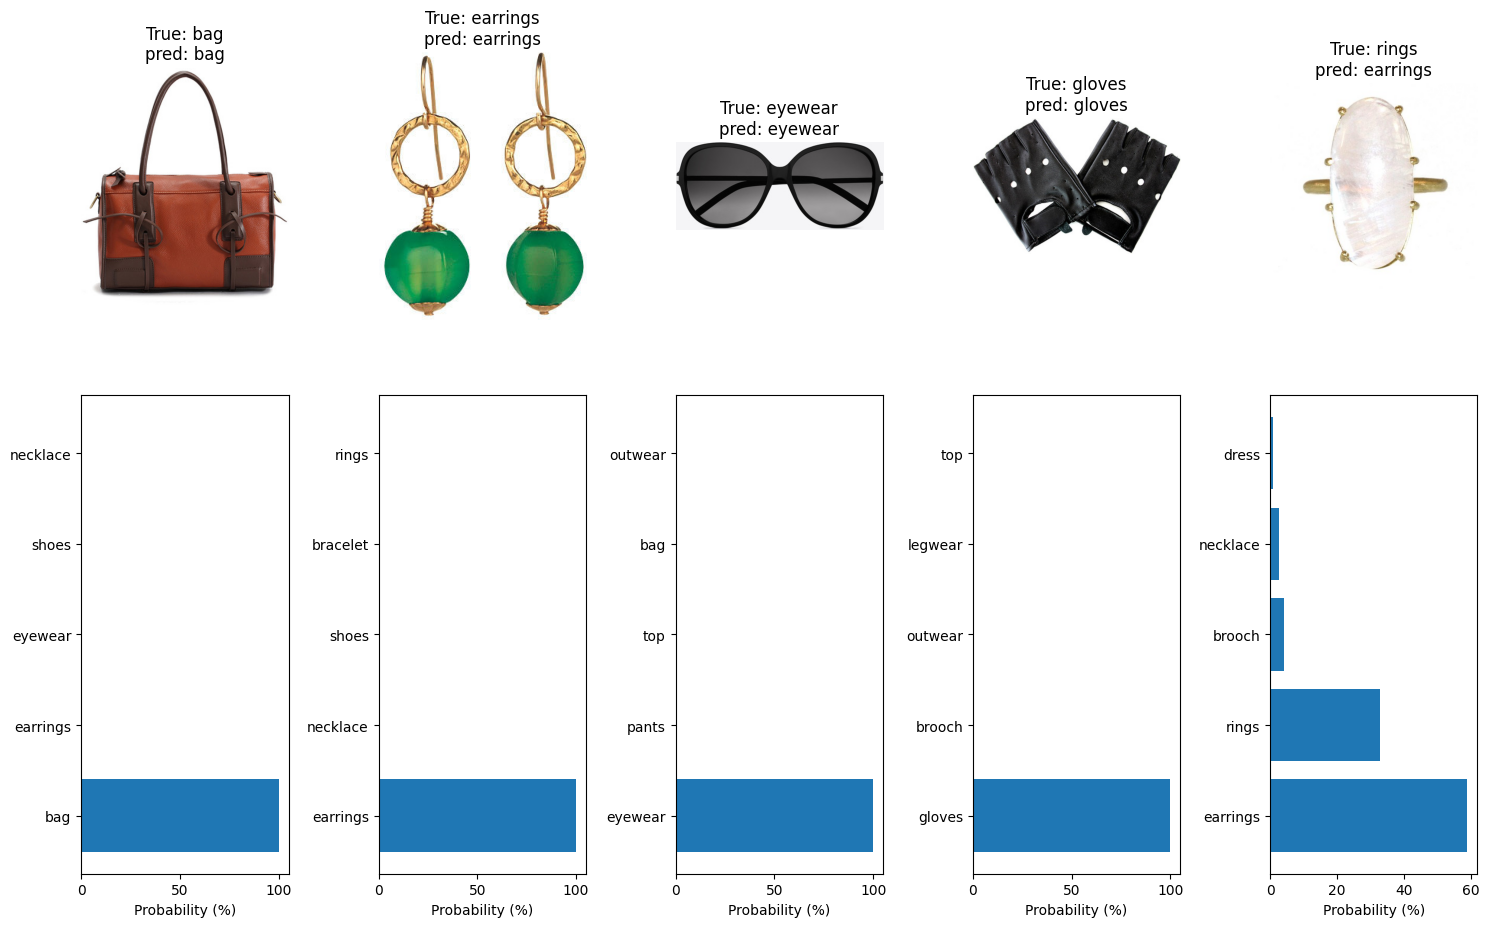

In [4]:
import torch
import matplotlib.pyplot as plt
import numpy as np
from torchvision import transforms, datasets, models
from torch.utils.data import DataLoader
import sys
from sklearn.metrics import f1_score
from PIL import Image
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

test_transforms = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

test_dir = "D:/COMP9444/project/data/test"
test_dataset = datasets.ImageFolder(test_dir, transform=test_transforms)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

model = models.mobilenet_v2(pretrained=False)
model.classifier = torch.nn.Sequential(
    torch.nn.Linear(model.last_channel, 1024),
    torch.nn.ReLU(),
    torch.nn.Dropout(0.2),
    torch.nn.Linear(1024, 20)
)
model.load_state_dict(torch.load("D:/MobileNetV2/mobilenetv2_fashion_classifier.pth", map_location=device))
model = model.to(device)
model.eval()

class_names = test_dataset.classes
correct = 0
total = 0

all_images = []
all_outputs = []
all_labels = []
all_filenames = []
all_preds = []

print("Testing Progress:")
with torch.no_grad():
    for batch_idx, (inputs, labels) in enumerate(test_loader):
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        _, preds = torch.max(outputs, 1)

        total += labels.size(0)
        correct += (preds == labels).sum().item()

        all_images.append(inputs.cpu())
        all_outputs.append(outputs.cpu())
        all_labels.append(labels.cpu())
        all_preds.append(preds.cpu())
        batch_filenames = [test_dataset.imgs[i][0] for i in range(batch_idx * test_loader.batch_size, min((batch_idx + 1) * test_loader.batch_size, len(test_dataset)))]
        all_filenames.extend(batch_filenames)

        progress = (batch_idx + 1) / len(test_loader) * 100
        sys.stdout.write(f"\rProgress: {progress:.2f}%")
        sys.stdout.flush()

all_images = torch.cat(all_images, dim=0)
all_outputs = torch.cat(all_outputs, dim=0)
all_labels = torch.cat(all_labels, dim=0)
all_preds = torch.cat(all_preds, dim=0)

confidence_scores = all_outputs.softmax(dim=1).max(dim=1).values

correct_indices = torch.where(all_preds == all_labels)[0]


f1 = f1_score(all_labels.numpy(), all_preds.numpy(), average='macro')
print(f"\nTest Accuracy: {100 * correct / total:.2f}%")
print(f"F1 Score: {f1:.4f}")

image_paths = [
    "D:/COMP9444/project/data/test/bag/102784872_4.jpg",
    "D:/COMP9444/project/data/test/earrings/12690998_10.jpg",
    "D:/COMP9444/project/data/test/eyewear/120631641_10.jpg",
    "D:/COMP9444/project/data/test/gloves/67951070_6.jpg",
    "D:/COMP9444/project/data/test/rings/78167019_5.jpg"
]

plt.figure(figsize=(15, 10))
for i, image_path in enumerate(image_paths):
    image = Image.open(image_path).convert('RGB')
    input_tensor = test_transforms(image).unsqueeze(0)
    input_tensor = input_tensor.to(device)

    with torch.no_grad():
        output = model(input_tensor)
        top5_prob, top5_idx = torch.topk(output.softmax(dim=1), 5)

    label = image_path.split('/')[-2]
    top5_labels = [class_names[idx] for idx in top5_idx[0]]

    plt.subplot(2, 5, i + 1)
    image_np = np.array(image)
    plt.imshow(image_np)
    plt.title(f"True: {label}\npred: {top5_labels[0]}")
    plt.axis('off')

    plt.subplot(2, 5, 5 + i + 1)
    plt.barh(top5_labels, (top5_prob[0].cpu().numpy() * 100).clip(0, 100))
    plt.xlabel('Probability (%)')

plt.tight_layout()
plt.show()